# 2 a


Solve for the optimal delta at which this orbit does not decay after 10 orbits. 


I began this problem by solving for the conditions which define the apocenters velocity via sdflkas, and used this to then determine the intial conditions of the problem. 



Plugging all that in I could next determine what the total t is for 1 orbital period, and after that I multiplied by 10 to determine the length needed to integrate over 10 orbits. 


Next, I began with an arbitrary delta, and observed what some of these graphs looked like. 


Running through this, I found an effective error tolerance to be 1e-8. Using this there was practically no orbital decay, and will be using this tolerance for the remainder of the experiment on how dynamicaly friction can physically decay black hole binary orbits to the regime where gravitational radiation is the dominant source of orbital decay, until the bodies merge!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def f(r,t):
    """
    For some given function with an input r and timestep t, we output the derivative of every value,
    which is in turn used in the rk4 integration 
    """
    
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    Dx = vx
    Dy = vy
    
    R = np.sqrt(x**2 + y**2)
    
    Dvx = -G*M*x/(4*R**3)
    
    Dvy = -G*M*y/(4*R**3)
    
    
    return np.array([Dx,Dy,Dvx,Dvy])

In [4]:
def rk4(h,r,f):
    """
    RK4 Integration for some step size of h
    
    """
    
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1,t+0.5*h)
    k3 = h*f(r + 0.5*k2,t+0.5*h)
    k4 = h*f(r + k3,t+h)

    rout = r + (k1 + 2*k2 + 2*k3 + k4)/6 #update occurs here
    return rout

In [26]:
G = M  = 1
rapo = 1
a = (1 + 1e-7)/2


vy = np.sqrt((G*M/4) *(2/rapo - 1/a))

In [39]:
a = (1 + 1e-7)/2


T = np.sqrt(16*np.pi**2 * a**3)

In [40]:
print("The time to take 10 orbits is approximately ", np.ceil(10*T))

The time to take 10 orbits is approximately  45.0


In [41]:
print("The starting velocity at aphelion is ", vy)

The starting velocity at aphelion is  0.000223606786644


In [57]:
h = 1e-4 # This is the initial stepping size. 


r0 = np.array([1.0,0.0,0.0,vy],float)


delta = 1e-6 # error tolerance 
r_sols = []
ts = []
t = 0 #initialize as 0 time 
int_time = 45 #ends after about 10 orbits. 

while t < int_time: 
    
    rtemp = rk4(h, r0, f)

    # Error at h and 2*h
    rError1 = rk4(h, rtemp, f)
    rError2 = rk4(2*h, r0, f)
    xerror = (rError1[0] - rError2[0])/30.  # 0th element -> x component
    yerror = (rError1[1] - rError2[1])/30.
    rho = h*delta/np.sqrt(xerror**2 + yerror**2)

    # If rho > 1, actual accuracy is better than the target accuracy. Keep it.
    if rho > 1:
        print("worked")
        t += h
        r0 = rtemp
        h = h*rho**(1/4) # Make it bigger since rho^1/4 > 1
        
        #save values and time step below
        r_sols.append(rtemp)
        ts.append(t)
        
    elif rho < 1:
        print('adapted')
        h = h * rho**(1/4)
        
        
        
xs = [x[0] for x in r_sols]
vxs = [x[2] for x in r_sols]


ys = [y[1] for y in r_sols]
vys = [y[3] for y in r_sols]

rs = np.sqrt(np.power(xs,2) + np.power(ys,2))


adapted
adapted
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
w

worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
ada

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
wo

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
wor

worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
ada

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
wo

worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
ada

worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
ada

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked


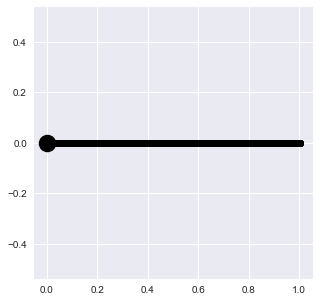

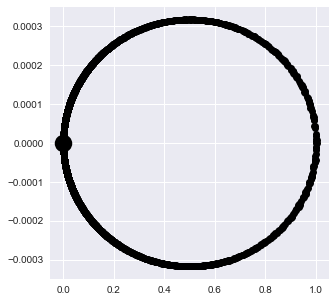

In [58]:
plt.figure(figsize=(5,5))
plt.axis('equal')
plt.plot(xs,ys,'ko')
plt.plot([0],[0],'k.',markersize=35)

plt.figure(figsize=(5,5))
plt.plot(xs,ys,'ko')
plt.plot([0],[0],'k.',markersize=35)

(0.9, 1.1)

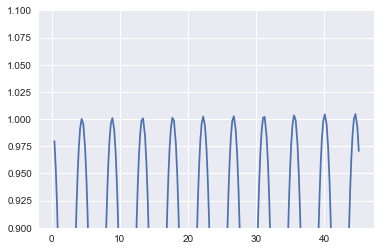

In [59]:
plt.plot(ts,rs)
plt.ylim([0.9,1.1])

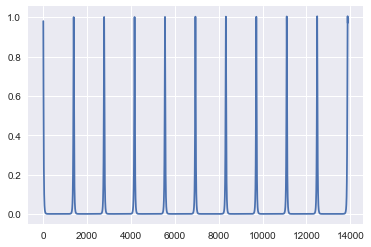

In [60]:
plt.plot(xs)

# Converting int time to total years


# orbital paremeters are based on I.C r and v

# from r and v0 we can estimate orbital period? t

In [ ]:
def U(r):    
    return G*M/r

def K(v):
    return np.power(v,2)/2

In [ ]:
r = np.sqrt(np.power(xs,2) + np.power(ys,2))

In [ ]:
v = np.sqrt(np.power(vxs,2) + np.power(vys,2))

In [ ]:
plt.plot

Initial velocity of part a, and use that to find delta


Start w very small delta, and optimize v0, then optimize 


Lose less than .1% of 

%apocenter changes by less than 10% over 10 full orbits. 

While looking at code 

same function, just adapted force function with an additional dfx and dfy


updating h and 

mass of black hole is 10^8 solar masses



In [ ]:
int_time/h0

In [ ]:
np.empty([4, int_tim/h0])